In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from math import sin,cos
import io
import cv2
import pykalman
from scipy import optimize
import matplotlib as mpl
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmath
import pandas as pd
from scipy.io import wavfile

# Лабораторная работа 2.7
Реализован метод фазового кодирования (phase coding), изложенный в работе W. Bender, D. Gruhl, N. Morimoto, A. Lu. Techniques for data hiding. IBM Systems Journal. Vol. 35, Issue: 3-4, 1996. doi: 10.1147/sj.353.0313
https://pdfs.semanticscholar.org/8c82/c93dfc7d3672e58efd982a23791a8a419053.pdf

In [38]:
binary_string =  "11000011100010010000"

In [39]:
Fs, data = wavfile.read('./tune1.wav')
#data = data[0:20000]
#print(Fs)
#print(data)
n = len(data)
print(n)
N = 100
l = n//N

1000000


In [40]:
ph = []
deltaph = []
A = []
ph.append(np.array([0]*l))
A.append(np.array([0]*l))
for i in range(N):
    q = data[i * l:((i+1) * l)].copy()
    ft = np.fft.fft(q)
    phi = []
    a = []
    for x in ft:
        phi.append(cmath.phase(x))
        a.append(abs(x))
    deltaph.append(np.array(phi) - np.array(ph[-1]))
    A.append(a)
    ph.append(phi)
   # if i == 0 :
   #     freqs = np.fft.fftfreq(len(ft), d=1/l)
   #     plt.figure(figsize=(20, 10))
   #     plt.plot(freqs, phi)

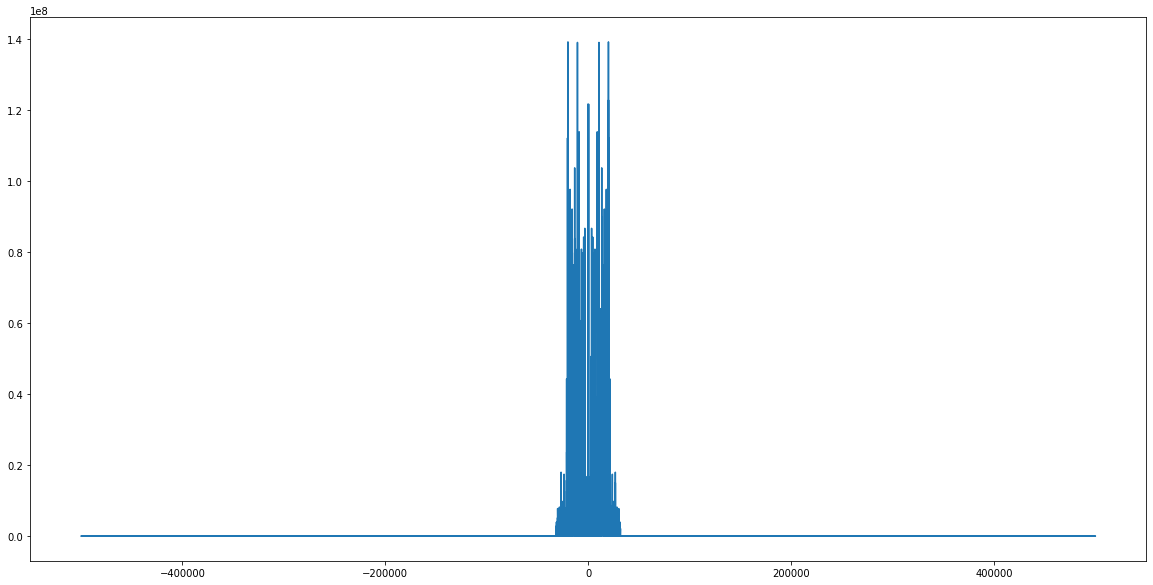

In [41]:
ft = np.fft.fft(data)
freqs = np.fft.fftfreq(len(ft), d=1/n)

plt.figure(figsize=(20, 10))
plt.plot(freqs, abs(ft))

In [42]:
phidata = []
for c in binary_string:
    if c == '0':
        phidata.append(math.pi/2)
    else:
        phidata.append(-math.pi/2)

In [43]:
phans = []
lm = l//2 - len(binary_string)
e = deltaph[0].copy()
for i in range(lm,lm+len(binary_string)):
    e[i] +=  phidata[i - lm]
for i in range(l//2,l//2+len(binary_string)):
    e[i] +=  phidata[len(binary_string) - (i - l//2) - 1]
phans.append(e)
for i in range(1,len(deltaph)):
    phans.append(np.array(phans[-1]) +  np.array(deltaph[i]))

In [44]:
data2 = []
for i in range(0,N):
    cod_data = []
    for j in range(0,len(A[i+1])):
      #  print(A[i+1][j])
      #  print(phans[i][j])
        num = cmath.rect(A[i+1][j],phans[i][j])
        cod_data.append(num)
    cod_data = np.fft.ifft(cod_data)
    for i in cod_data:
        data2.append(i)
#print(cod_data)

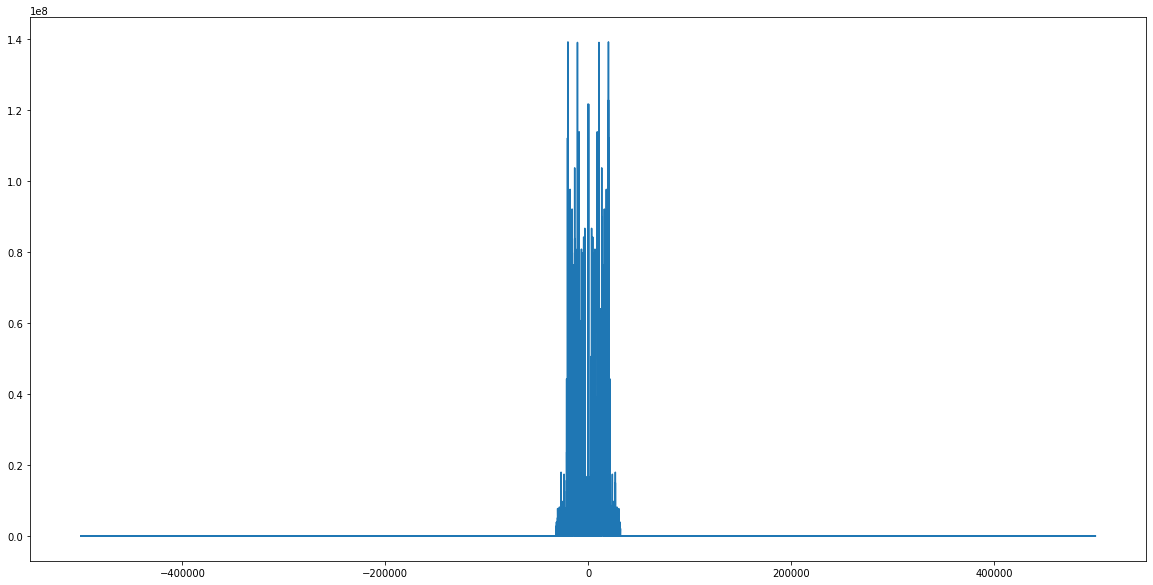

In [45]:
ft = np.fft.fft(data2)
freqs = np.fft.fftfreq(len(ft), d=1/n)

plt.figure(figsize=(20, 10))
plt.plot(freqs, abs(ft))
data_ans = []
for i in data2:
    data_ans.append(np.int16(i.real))
wavfile.write('./tune_filt1.wav', Fs, np.int16(data_ans))

In [46]:
N = n // l
ph1 = []
deltaph1 = []
A1 = []
ph1.append(np.array([0]*l))
A1.append(np.array([0]*l))
for i in range(N):
    q = data2[i*l:((i+1)*l)].copy()
    ft = np.fft.fft(q)
    phi = []
    a = []
    for x in ft:
        phi.append(cmath.phase(x))
        a.append(abs(x))
    deltaph1.append(np.array(phi) - np.array(ph1[-1]))
    A1.append(a)
    ph1.append(phi)

In [47]:
def normalize(phi):
    while phi > math.pi:
        phi-= 2*math.pi
    while phi < -math.pi:
        phi+=2*math.pi
    return phi

In [48]:
mynewdata  = ph1[1] - deltaph[0] 
for i in range(len(mynewdata)):
    mynewdata[i] = normalize(mynewdata[i])
s = ""
lm = l//2 - len(binary_string)
for  x in range(lm,lm+len(binary_string)):
    if mynewdata[x] < 0 :
        s+="1"
    else:
        s+="0"
print(s)
print(mynewdata)
print(phidata)

11000011100010010000
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.8817842e-16 4.4408921e-16
 4.4408921e-16]
[-1.5707963267948966, -1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, -1.5707963267948966, -1.5707963267948966, -1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, -1.5707963267948966, 1.5707963267948966, 1.5707963267948966, -1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966]
